# THE SPARKS FOUNDATION
_______________________________________________________________________________________________________________________________

# TULIKA MALIK
-------------------------------------------------------------------------------------------------------------------------------

# Graduate Rotational Internship Program

# Task 2 : Prediction Using Unsupervised Machine Learning

# Aim : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

In [56]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import datasets
from sklearn.cluster import KMeans

# Importing the data

In [57]:
# Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
#Finding the no. of rows and columns

iris_df.shape

(150, 4)

In [59]:
#Extracting the information about the dataset

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [67]:
# Finding the sum of null values

iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [61]:
#Finding the various satistical measures of dataset

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

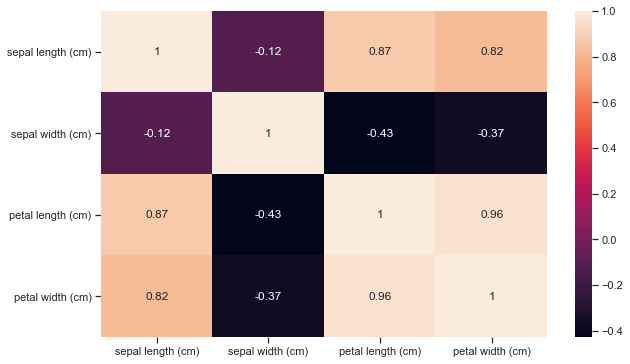

In [62]:
# Drawing heatmap

plt.figure(figsize=(10,6))
corrMatrix=iris_df.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

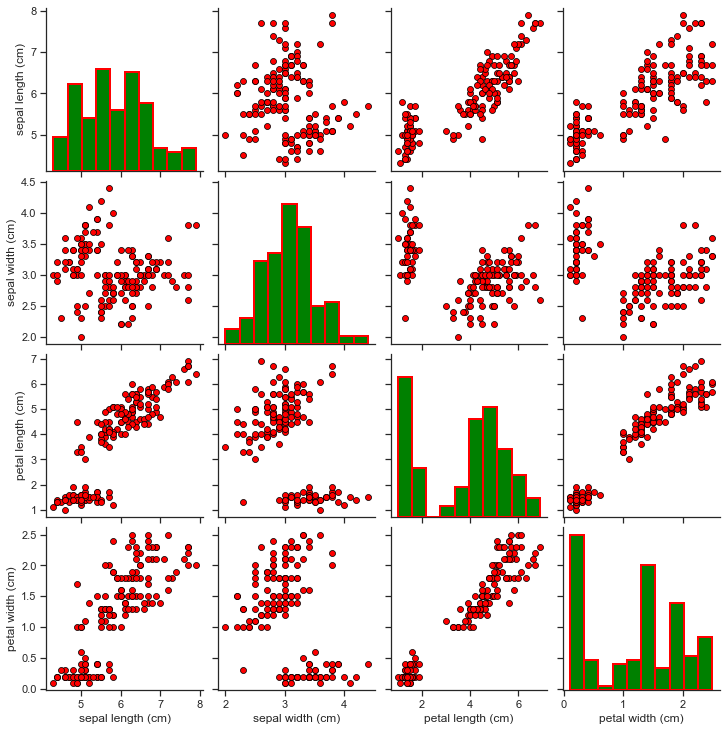

In [63]:
#Drawing pairplot of features

sns.set(style="ticks",color_codes=True)
sns.pairplot(iris_df,diag_kind="hist",diag_kws={'color':'green','edgecolor': 'red','linewidth':2},
             plot_kws={'color':'red','edgecolor':'black'})
plt.show()

# Finding the optimum number of clusters for k-means classification

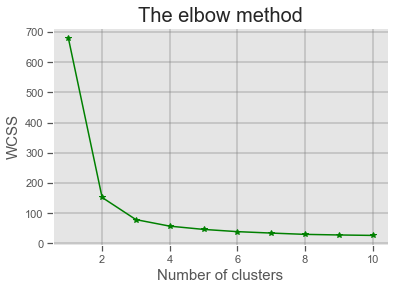

In [64]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, :].values


n= []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    n.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'

style.use('ggplot')
plt.plot(range(1, 11), n,color='green',marker='*')
plt.title('The elbow method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('WCSS',fontsize=15) # Within cluster sum of squares
plt.grid(color='grey',linewidth='2',linestyle='-',alpha=0.3)
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [65]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Plotting the Centroids of the Clusters

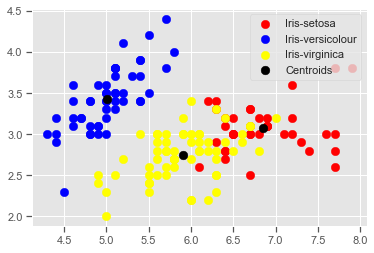

In [66]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 70, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 70, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 70, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 75, c = 'black', label = 'Centroids')

plt.legend(loc=1)
plt.show()

# So, optimum number of clusters is 3.